## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [3]:
df_train = pd.read_csv("Titanic_train.csv")
display(df_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
print(df_train[["Pclass","Sex","Age"]])  ##一次取多項欄位

     Pclass     Sex   Age
0         3    male  22.0
1         1  female  38.0
2         3  female  26.0
3         1  female  35.0
4         3    male  35.0
..      ...     ...   ...
886       2    male  27.0
887       1  female  19.0
888       3  female   NaN
889       1    male  26.0
890       3    male  32.0

[891 rows x 3 columns]


In [15]:
## 遺失值比例
missing_value = df_train.isnull()/len(df_train)
missing_value.sort_values(ascending = False)
missing_value = df.DataFrame(mssing_value, columns=['missing_rate'])
print(missing_value)

TypeError: sort_values() missing 1 required positional argument: 'by'

## 觀察 Age
### step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?

29.69911764705882
14.526497332334044


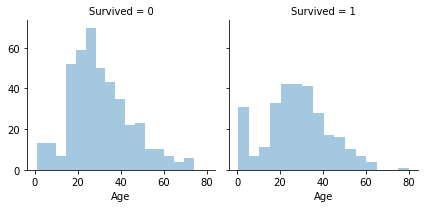

In [34]:
print(df_train['Age'].mean())
print(df_train['Age'].std())

g = sns.FacetGrid(df_train,col='Survived')

g.map(sns.distplot,'Age',kde=False)

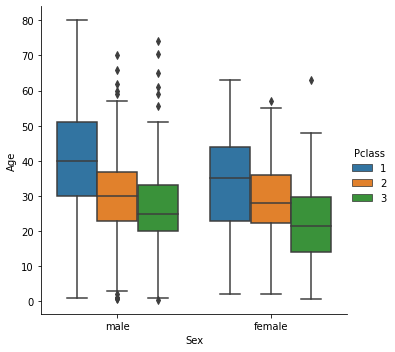

In [21]:
#Age、Sex、Pclass 的關聯
g = sns.catplot(x='Sex',y='Age',hue='Pclass',data=df_train,kind="box")

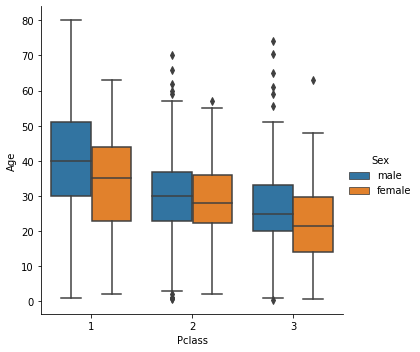

In [50]:
g = sns.catplot(x='Pclass',y='Age',hue='Sex',data=df_train,kind='box')

### step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。

In [22]:
missing_data = df_train.isnull().any()
missing_data

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### Step1: 離散轉連續型資料

In [37]:
data3 = df_train[['Pclass','Sex','Age']]

data_train = data3.copy()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_train['Sex']=le.fit_transform(data_train['Sex'])
display(data_train)

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
886,2,1,27.0
887,1,0,19.0
888,3,0,NaN
889,1,1,26.0


### Step 2 :計算資料點的倆倆距離 
#### 都是數字才可以計算

In [38]:
from sklearn.metrics.pairwise import nan_euclidean_distances
display(pd.DataFrame(nan_euclidean_distances(data_train)))

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.155494,4.123106,13.190906,13.000000,0.000000,32.062439,20.000000,5.099020,8.124038,...,11.000000,1.000000,6.082763,3.000000,17.029386,5.099020,3.741657,1.224745,4.472136,10.000000
1,16.155494,0.000000,12.165525,3.000000,3.741657,2.738613,16.031220,36.069378,11.180340,24.020824,...,5.477226,16.124515,10.099505,13.190906,2.236068,11.090537,19.000000,2.449490,12.041595,6.403124
2,4.123106,12.165525,0.000000,9.219544,9.055385,1.224745,28.089144,24.020824,1.000000,12.041595,...,7.071068,4.000000,2.449490,1.414214,13.000000,1.732051,7.280110,0.000000,2.236068,6.082763
3,13.190906,3.000000,9.219544,0.000000,2.236068,2.738613,19.026298,33.075671,8.246211,21.023796,...,3.000000,13.152946,7.141428,10.246951,4.472136,8.124038,16.000000,2.449490,9.055385,3.741657
4,13.000000,3.741657,9.055385,2.236068,0.000000,0.000000,19.104973,33.000000,8.062258,21.047565,...,2.000000,13.038405,7.071068,10.000000,4.123106,8.062258,16.155494,1.224745,9.219544,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.099020,11.090537,1.732051,8.124038,8.062258,1.224745,27.018512,25.019992,1.414214,13.038405,...,6.082763,5.196152,1.000000,2.236068,12.083046,0.000000,8.124038,1.732051,1.414214,5.099020
887,3.741657,19.000000,7.280110,16.000000,16.155494,2.738613,35.014283,17.146428,8.246211,5.099020,...,14.177447,3.605551,9.110434,6.403124,20.099751,8.124038,0.000000,2.449490,7.071068,13.190906
888,1.224745,2.449490,0.000000,2.449490,1.224745,1.224745,2.738613,1.224745,0.000000,1.224745,...,1.224745,0.000000,1.732051,1.224745,0.000000,1.732051,2.449490,0.000000,2.738613,1.224745
889,4.472136,12.041595,2.236068,9.055385,9.219544,2.449490,28.000000,24.083189,2.449490,12.083046,...,7.280110,4.582576,2.236068,2.236068,13.190906,1.414214,7.071068,2.738613,0.000000,6.324555


### Step3: 透過 KNN 進行補值

In [39]:
value_neighbor = 1
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbor)
df_filled = pd.DataFrame(imputer.fit_transform(data_train))
display(df_filled)

,0,1,2
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
...,...,...,...
886,2.0,1.0,27.0
887,1.0,0.0,19.0
888,3.0,0.0,26.0
889,1.0,1.0,26.0


In [40]:
value_neighbor = 3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbor)
df_filled = pd.DataFrame(imputer.fit_transform(data_train))
display(df_filled)

,0,1,2
0,3.0,1.0,22.0
1,1.0,0.0,38.0
2,3.0,0.0,26.0
3,1.0,0.0,35.0
4,3.0,1.0,35.0
...,...,...,...
886,2.0,1.0,27.0
887,1.0,0.0,19.0
888,3.0,0.0,19.0
889,1.0,1.0,26.0


### MSE 觀察

In [43]:
#* Step1:取無遺失值的資料集
data_MSE = data_train.copy()
import random
completet_data = data_MSE.dropna() #dropna去掉含有缺失值的樣本
completet_data=completet_data.reset_index(drop = True)
display(completet_data)


,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0
...,...,...,...
709,3,0,39.0
710,2,1,27.0
711,1,0,19.0
712,1,1,26.0


In [ ]:
#* Step2:隨機取 15 個資料點，當作遺失值

a = random.sample(list(completet_data.index),15)
missing_data = completet_data.copy()
missing_data['Age'].iloc[a]=np.nan
display(missing_data)

#### 用 K = 1 進行補值

In [48]:
#* Step3:以step2產生的遺失值進行補值
k = 1
imputer = KNNImputer(n_neighbors=k)
verify_impute = pd.DataFrame(imputer.fit_transform(missing_data))
verify_impute.rename(columns={0:'Pclass',1:'Sex',2:'Age',3:'imputer.Age'},inplace = True)


#Step4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。
from sklearn.metrics import mean_squared_error

y1 = completet_data['Age']
y2 = verify_impute['Age']
MSE_1=mean_squared_error(y1,y2)
print(MSE_1)

2.767857142857143


#### 用 K = 3 進行補值

In [49]:
#* Step3:以step2產生的遺失值進行補值
k = 3
imputer = KNNImputer(n_neighbors=k)
verify_impute = pd.DataFrame(imputer.fit_transform(missing_data))
verify_impute.rename(columns={0:'Pclass',1:'Sex',2:'Age',3:'imputer.Age'},inplace=True)

#Step4: 計算MSE看補值的效果，可以透過這一個方法，比較不同補植策略下 MSE 的大小。

y1 = completet_data['Age']
y2 = verify_impute['Age']
MSE_3=mean_squared_error(y1,y2)
print(MSE_3)

4.51108776844071


#### 根據算出來的結果，越小代表補植的準確度越高，而經過上面的範例，可以看到K=1的值比K=3的值還要小，所以用K=1補Age的值較為準確